In [ ]:
!pip install datasets matplotlib
from datasets import Dataset

raw_train_ds = Dataset.from_json("./data.train.jsonlines")
raw_val_ds = Dataset.from_json("./data.validation.jsonlines")
raw_test_ds = Dataset.from_json("./data.test.jsonlines")

print(raw_train_ds)
print(raw_val_ds)
print(raw_test_ds)

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['id', 'text', 'uuid', 'ewg_rating', 'scalp_rating'],
    num_rows: 66
})
Dataset({
    features: ['id', 'text', 'uuid', 'ewg_rating', 'scalp_rating'],
    num_rows: 13
})
Dataset({
    features: ['id', 'text', 'uuid', 'ewg_rating', 'scalp_rating'],
    num_rows: 15
})


In [ ]:
raw_train_ds[0]

{'id': 1,
 'text': 'International Journal of Toxicology , 24(Suppl. 3):75–118, 2005\nCopyright c/circlecopyrtAmerican College of Toxicology\nISSN: 1091-5818 print / 1092-874X onlineDOI: 10.1080/10915810500257170\nFinal Report of the Safety Assessment of Acacia Catechu\nGum, Acacia Concinna Fruit Extract, Acacia Dealbata LeafExtract, Acacia Dealbata Leaf Wax, Acacia DecurrensExtract, Acacia Farnesiana Extract, Acacia FarnesianaFlower Wax, Acacia Farnesiana Gum, Acacia SenegalExtract, Acacia Senegal Gum, and Acacia SenegalGum Extract\n1\nThese ingredients are derived from various species of the acacia\nplant. Only material derived from Acacia senegal are in current\nuse according to industry data. The concentration at which these\ningredients are reported to be used ranges from 9% in mascara to\n0.0001% in tonics, dressings, and other hair-grooming aids. Gum\narabic is a technical name for Acacia Senegal Gum. Gum ara-\nbic is comprised of various sugars and glucuronic acid residues ina l

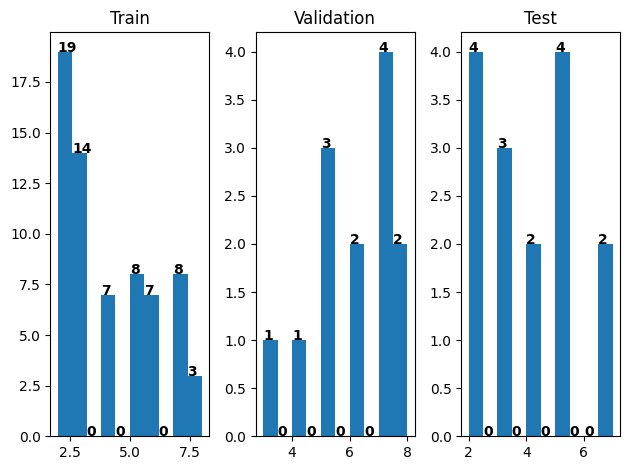

In [ ]:
# %pip install matplotlib
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, tight_layout=True)
distributions = []

axs[0].set_title("Train")
axs[1].set_title("Validation")
axs[2].set_title("Test")
train_distributions = axs[0].hist(raw_train_ds["scalp_rating"], bins=10)
val_distributions = axs[1].hist(raw_val_ds["scalp_rating"], bins=10)
test_distributions = axs[2].hist(raw_test_ds["scalp_rating"], bins=10)

for distributions, ax in zip(
    [train_distributions, val_distributions, test_distributions], axs
):
    for j in range(10):
        # Display the counts on each column of the histograms
        ax.text(
            distributions[1][j],
            distributions[0][j],
            str(int(distributions[0][j])),
            weight="bold",
        )

In [ ]:
%pip install transformers==4.41.0 accelerate==0.27.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 31.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [ ]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments,
)
from torch.utils.data import DataLoader

# BASE_MODEL = "camembert-base"
BASE_MODEL = "bert-base-uncased"
LEARNING_RATE = 2e-5
MAX_LENGTH = 256
BATCH_SIZE = 16
EPOCHS = 20

# Let's name the classes 0, 1, 2, 3, 4 like their indices
id2label = {k: k for k in range(10)}
label2id = {k: k for k in range(10)}

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(
#     BASE_MODEL, id2label=id2label, label2id=label2id
# )
model = AutoModelForSequenceClassification.from_pretrained(BASE_MODEL, num_labels=10)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
ds = {"train": raw_train_ds, "validation": raw_val_ds, "test": raw_test_ds}


def preprocess_function(examples):
    label = examples["scalp_rating"]
    examples = tokenizer(
        examples["text"], truncation=True, padding="max_length", max_length=256
    )
    examples["label"] = label
    return examples


for split in ds:
    ds[split] = ds[split].map(
        preprocess_function, remove_columns=["id", "uuid", "text", "scalp_rating","ewg_rating"]
    )

Map:   0%|          | 0/13 [00:00<?, ? examples/s]

In [ ]:
# %pip install scikit-learn
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
# Install the required packages
# %pip install transformers[torch] accelerate==0.21.0


In [ ]:
from transformers import AutoModelForSequenceClassification
from datasets import load_dataset

# Assuming `ds`, `model`, and `compute_metrics` are already defined.
# Example definitions:
# ds = load_dataset('your_dataset')
# model = AutoModelForSequenceClassification.from_pretrained('your_model')
# compute_metrics = your_compute_metrics_function

training_args = TrainingArguments(
    # output_dir="../models/camembert-fine-tuned-regression",
    output_dir="../models/bert-fine-tuned-regression",
    learning_rate=2e-5,  # Set your learning rate
    per_device_train_batch_size=16,  # Set your batch size
    per_device_eval_batch_size=16,  # Set your batch size
    num_train_epochs=20,  # Set your number of epochs
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="accuracy",
    load_best_model_at_end=True,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["validation"],
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,2.532820,0.000000
2,No log,2.389038,0.000000
3,No log,2.058096,0.153846
4,No log,2.095630,0.153846
5,No log,2.084900,0.153846
6,No log,2.073451,0.153846
7,No log,1.988442,0.230769
8,No log,2.007137,0.230769
9,No log,2.005945,0.230769
10,No log,1.999472,0.230769


TrainOutput(global_step=100, training_loss=1.5042039489746093, metrics={'train_runtime': 227.9788, 'train_samples_per_second': 5.79, 'train_steps_per_second': 0.439, 'total_flos': 173665769840640.0, 'train_loss': 1.5042039489746093, 'epoch': 20.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 1.9422377347946167,
 'eval_accuracy': 0.38461538461538464,
 'eval_runtime': 0.2574,
 'eval_samples_per_second': 50.506,
 'eval_steps_per_second': 3.885,
 'epoch': 20.0}

In [ ]:
trainer.eval_dataset=ds["test"]
trainer.evaluate()

{'eval_loss': 1.5644105672836304,
 'eval_accuracy': 0.3333333333333333,
 'eval_runtime': 0.2504,
 'eval_samples_per_second': 59.908,
 'eval_steps_per_second': 3.994,
 'epoch': 20.0}

In [ ]:
import torch
import pandas as pd

input_texts = ["CIR Supplement Manuscript\nInternational Journal of Toxicology\n2022, Vol. 41(Supplement 1) 80S –105S\n© The Author(s) 2022\nArticle reuse guidelines:sagepub.com/journals-permissions\nDOI: 10.1177/10915818221087202\njournals.sagepub.com/home/ijtSafety Assessment of Carbonate Salts as Used\nin Cosmetics\nWilbur Johnson*, Wilma F. Bergfeld†, Donald V. Belsito†, Ronald A. Hill‡,\nCurtis D. Klaassen†, Daniel C. Liebler†, James G. Marks‡, Ronald C. Shank†, Thomas J. Slaga†,\nPaul W. Snyder†, Lillian J. Gill§, and Bart Heldreth¶\nAbstract\nThe Expert Panel for Cosmetic Ingredient Safety (Panel) assessed the safety of 6 carbonate salts which function as absorbents,bulking agents, opacifying agents, pH adjusters, buffering agents, abrasives, and oral care agents in cosmetic products. The Panelreviewed relevant data relating to the safety of these ingredients, and concluded that these carbonate salts are safe in the present\npractices of use and concentration in cosmetics when formulated to be non-irritating.\nIntroduction\nThe safety of the following 6 carbonate salts as used in\ncosmetics is reviewed in this safety assessment:\nMagnesium Carbonate\nAmmonium Bicarbonate\nAmmonium Carbonate\nCalcium CarbonatePotassium BicarbonatePotassium Carbonate\nAccording to the International Cosmetic Ingredient Dic-\ntionary and Handbook (Dictionary ), the functions of these\ningredients in cosmetic products include: absorbents, bulking\nagents, opacifying agents, pH adjusters, buffering agents,\nabrasives, and oral care agents (Table 1).\n1Ingredient de ﬁni-\ntions are also included in Table 1.\nThe Expert Panel for Cosmetic Ingredient Safety (Panel)\nhas evaluated the safety of Sodium Sesquicarbonate, SodiumBicarbonate, and Sodium Carbonate in cosmetic products, andconcluded that these ingredients are “safe as presently used in\ncosmetics. ”\n2Aﬁnal report with this conclusion was published\nin 1987. Subsequently, during a Panel re-review of the safety\nof these ingredients in 2004, the conclusion"]

# Encode the text
encoded = tokenizer(input_texts, truncation=True, padding="max_length", max_length=256, return_tensors="pt").to("cuda")

# Call the model to predict under the format of logits of 5 classes
logits = model(**encoded).logits

# Get the class
predicted_class = torch.argmax(logits, axis=1)
print(predicted_class)

tensor([3], device='cuda:0')


# Code along with visualisation

In [ ]:
# -*- coding: utf-8 -*-
"""train.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1sO5uQ_Xe1bEYXyYEtp9UOVwBPgfoQvNa
"""

!pip install datasets matplotlib transformers scikit-learn torch torchviz

from datasets import Dataset
from transformers import (
    AutoTokenizer,
    BertModel,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
)
import torch
import torch.nn as nn
import numpy as np
from datasets import load_metric
import matplotlib.pyplot as plt
from torchviz import make_dot

# Load datasets
raw_train_ds = Dataset.from_json("./data.train.jsonlines")
raw_val_ds = Dataset.from_json("./data.validation.jsonlines")
raw_test_ds = Dataset.from_json("./data.test.jsonlines")

print(raw_train_ds)
print(raw_val_ds)
print(raw_test_ds)


Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['id', 'text', 'uuid', 'ewg_rating', 'scalp_rating'],
    num_rows: 66
})
Dataset({
    features: ['id', 'text', 'uuid', 'ewg_rating', 'scalp_rating'],
    num_rows: 13
})
Dataset({
    features: ['id', 'text', 'uuid', 'ewg_rating', 'scalp_rating'],
    num_rows: 15
})


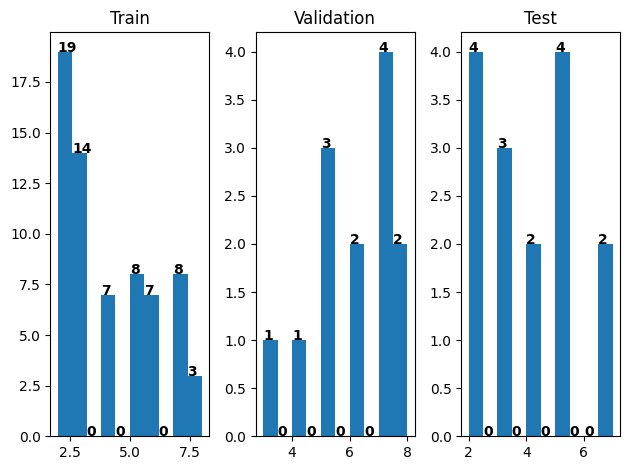

In [ ]:

# Plot distributions
fig, axs = plt.subplots(1, 3, tight_layout=True)
distributions = []

axs[0].set_title("Train")
axs[1].set_title("Validation")
axs[2].set_title("Test")
train_distributions = axs[0].hist(raw_train_ds["scalp_rating"], bins=10)
val_distributions = axs[1].hist(raw_val_ds["scalp_rating"], bins=10)
test_distributions = axs[2].hist(raw_test_ds["scalp_rating"], bins=10)

for distributions, ax in zip([train_distributions, val_distributions, test_distributions], axs):
    for j in range(10):
        ax.text(distributions[1][j], distributions[0][j], str(int(distributions[0][j])), weight="bold")


In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModel,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments,
)
from torch.utils.data import DataLoader
from datasets import load_dataset, Dataset, DatasetDict
from transformers import AutoModelForSequenceClassification
from transformers import AutoConfig
from transformers import AdamW
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch.nn.functional as F

BASE_MODEL = "bert-base-uncased"
LEARNING_RATE = 2e-5
MAX_LENGTH = 256
BATCH_SIZE = 16
EPOCHS = 20

# Load the pre-trained BERT model
bert_model = AutoModel.from_pretrained(BASE_MODEL)

# Add a fully connected layer on top of the BERT model
num_labels = 10
hidden_size = bert_model.config.hidden_size
dropout = 0.3

In [ ]:

class BertClassifier(nn.Module):
    def __init__(self):
        super(BertClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_labels)
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, input_ids, attention_mask, token_type_ids=None, labels=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1]
        x = self.dropout(pooled_output)
        x = self.fc1(x)
        x = self.relu(x)
        logits = self.fc2(x)

        if labels is not None:
            loss = self.loss_fn(logits, labels)
            return loss, logits
        return logits


# Initialize the model
model = BertClassifier()

# Set the model to evaluation mode
model.eval()

# Example input
input_ids = torch.tensor([[31, 51, 99], [15, 5, 0]])
attention_mask = torch.tensor([[1, 1, 1], [1, 1, 0]])

# Get the model output
with torch.no_grad():
    output = model(input_ids, attention_mask)

# Print the output
print(output)

tensor([[ 6.3462e-02, -9.1033e-02, -2.9706e-02, -2.0683e-01,  2.6019e-01,
         -6.1956e-02, -2.4198e-02, -1.9889e-04,  6.7447e-02, -5.5872e-02],
        [ 1.1777e-01, -2.0429e-02,  1.7126e-01, -2.2325e-02, -1.3271e-02,
          6.2876e-02, -2.2673e-02,  1.5236e-01, -5.3527e-02,  2.6735e-01]])


In [ ]:

# Load the dataset
ds = load_dataset('json', data_files={'train': './data.train.jsonlines', 'validation': './data.validation.jsonlines', 'test': './data.test.jsonlines'})

# Preprocess the dataset
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

def preprocess_function(examples):
    label = examples["scalp_rating"]
    examples = tokenizer(
        examples["text"], truncation=True, padding="max_length", max_length=256
    )
    examples["label"] = label
    return examples

ds = ds.map(preprocess_function, batched=True)

# Create a DataCollator to pad the input sequences
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/66 [00:00<?, ? examples/s]

Map:   0%|          | 0/13 [00:00<?, ? examples/s]

Map:   0%|          | 0/15 [00:00<?, ? examples/s]

In [ ]:

# Create a TrainingArguments object to specify the training hyperparameters
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=25,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy="epoch",
    learning_rate=2e-5,
    save_total_limit=2,
    save_steps=500,
    load_best_model_at_end=True,
)

# Create a Trainer object to train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds['train'],
    eval_dataset=ds['validation'],
    data_collator=data_collator,
    compute_metrics=lambda pred: {'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1))},
)

# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,2.228843,0.000000
2,2.024300,2.228889,0.000000
3,2.024300,2.228042,0.000000
4,2.023400,2.227142,0.000000
5,2.023400,2.227235,0.000000
6,2.017800,2.227295,0.000000
7,2.017800,2.226705,0.000000
8,2.032100,2.225986,0.000000
9,2.032100,2.226229,0.000000
10,1.975000,2.223162,0.000000


TrainOutput(global_step=125, training_loss=1.9662290725708007, metrics={'train_runtime': 414.4764, 'train_samples_per_second': 3.981, 'train_steps_per_second': 0.302, 'total_flos': 0.0, 'train_loss': 1.9662290725708007, 'epoch': 25.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 2.1883223056793213,
 'eval_accuracy': 0.07692307692307693,
 'eval_runtime': 0.2451,
 'eval_samples_per_second': 53.04,
 'eval_steps_per_second': 4.08,
 'epoch': 25.0}

In [ ]:

# Evaluate on test set
trainer.eval_dataset = ds["test"]
trainer.evaluate()


{'eval_loss': 2.101757049560547,
 'eval_accuracy': 0.26666666666666666,
 'eval_runtime': 0.2635,
 'eval_samples_per_second': 56.917,
 'eval_steps_per_second': 3.794,
 'epoch': 25.0}

In [ ]:

# Inference example
input_texts = ["CIR Supplement Manuscript\nInternational Journal of Toxicology\n2022, Vol. 41(Supplement 1) 80S –105S\n© The Author(s) 2022\nArticle reuse guidelines:sagepub.com/journals-permissions\nDOI: 10.1177/10915818221087202\njournals.sagepub.com/home/ijtSafety Assessment of Carbonate Salts as Used\nin Cosmetics\nWilbur Johnson*, Wilma F. Bergfeld†, Donald V. Belsito†, Ronald A. Hill‡,\nCurtis D. Klaassen†, Daniel C. Liebler†, James G. Marks‡, Ronald C. Shank†, Thomas J. Slaga†,\nPaul W. Snyder†, Lillian J. Gill§, and Bart Heldreth¶\nAbstract\nThe Expert Panel for Cosmetic Ingredient Safety (Panel) assessed the safety of 6 carbonate salts which function as absorbents,bulking agents, opacifying agents, pH adjusters, buffering agents, abrasives, and oral care agents in cosmetic products. The Panelreviewed relevant data relating to the safety of these ingredients, and concluded that these carbonate salts are safe in the present\npractices of use and concentration in cosmetics when formulated to be non-irritating.\nIntroduction\nThe safety of the following 6 carbonate salts as used in\ncosmetics is reviewed in this safety assessment:\nMagnesium Carbonate\nAmmonium Bicarbonate\nAmmonium Carbonate\nCalcium CarbonatePotassium BicarbonatePotassium Carbonate\nAccording to the International Cosmetic Ingredient Dic-\ntionary and Handbook (Dictionary ), the functions of these\ningredients in cosmetic products include: absorbents, bulking\nagents, opacifying agents, pH adjusters, buffering agents,\nabrasives, and oral care agents (Table 1).\n1Ingredient de ﬁni-\ntions are also included in Table 1.\nThe Expert Panel for Cosmetic Ingredient Safety (Panel)\nhas evaluated the safety of Sodium Sesquicarbonate, SodiumBicarbonate, and Sodium Carbonate in cosmetic products, andconcluded that these ingredients are “safe as presently used in\ncosmetics."]

encoded = tokenizer(input_texts, truncation=True, padding="max_length", max_length=256, return_tensors="pt").to("cuda")
logits = model(**encoded)
predicted_class = torch.argmax(logits, axis=1)
print(predicted_class)


tensor([3], device='cuda:0')
